## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df_mouse_study = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
df_mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
nbr_of_mice = mouse_metadata["Mouse ID"].count()
nbr_of_mice


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df_duplicate_rows = df_mouse_study[df_mouse_study.duplicated()]
df_duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
df_mouse_g989 = df_mouse_study.loc[df_mouse_study['Mouse ID']=='g989']
df_mouse_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_clean_mouse = df_mouse_study.drop_duplicates()
df_clean_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.


df_clean_mouse["Mouse ID"].value_counts()


g989    12
v923    10
y769    10
j989    10
y260    10
        ..
u153     1
h428     1
t573     1
v199     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

df_mouse_group = df_clean_mouse.groupby(["Drug Regimen"])

#df_mouse_group.head(5)
# # This method is the most straighforward, creating multiple series and putting them all together at the end.


tumor_volume_mean = df_mouse_group["Tumor Volume (mm3)"].mean()
tumor_volume_median = df_mouse_group["Tumor Volume (mm3)"].median()
tumor_volume_std = df_mouse_group["Tumor Volume (mm3)"].std()
tumor_volume_var = df_mouse_group["Tumor Volume (mm3)"].var()
tumor_volume_sem = df_mouse_group["Tumor Volume (mm3)"].sem()

df_mouse_summary = pd.DataFrame({
                                "Tumor Volume Mean":tumor_volume_mean,
                                 "Tumor Volume Median":tumor_volume_median,
                                 "Tumor Volume Standard Deviation":tumor_volume_std,
                                 "Tumor Volume_Variance":tumor_volume_var,
                                 "Tumor Volume SEM":tumor_volume_sem})
                                 
df_mouse_summary

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Standard Deviation,Tumor Volume_Variance,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.368318,50.909965,6.502160,42.278090,0.514041
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
df_mouse_statistics = df_clean_mouse.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean','median','std','var','sem']})
df_mouse_statistics

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.368318  50.909965  6.502160  42.278090  0.514041
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar and Pie Charts

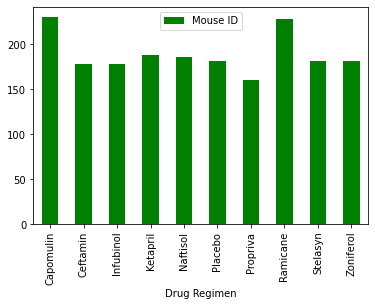

In [22]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#filter the dataframe down to only to those columns to chart

df_regimen_and_mouse = df_clean_mouse[["Drug Regimen","Mouse ID"]]

df_bar_chart_by_regimen = df_regimen_and_mouse.groupby(["Drug Regimen"]).count()


df_bar_chart_by_regimen.plot.bar(color="Green")


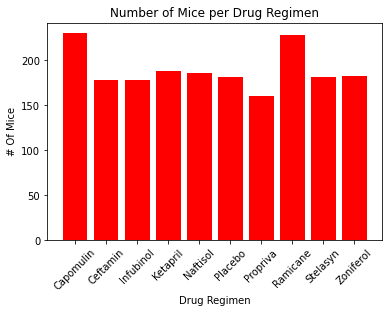

In [39]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

axislist = df_bar_chart_by_regimen.reset_index().values.tolist()
#axislist

regimen_list = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril','Naftisol', 'Placebo', 'Propriva',
               'Ramicane','Stelasyn', 'Zoniferol']

mice_list =[230,178,178,188,186,181,160,228,181,182]

plt.bar(regimen_list, mice_list, color="r", align="center")


plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# Of Mice")
plt.xticks(rotation=45)

plt.show()





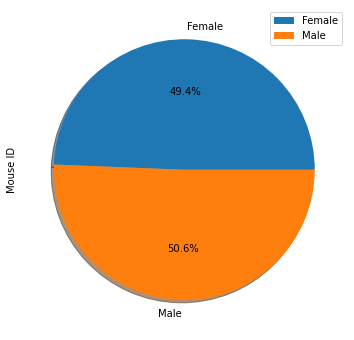

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df_by_sex = df_clean_mouse[["Sex","Mouse ID"]]

df_pie_chart_by_sex = df_by_sex.groupby(["Sex"]).count()

plot = df_pie_chart_by_sex.plot.pie(subplots=True, autopct='%1.1f%%', shadow=True, figsize=(11, 6))


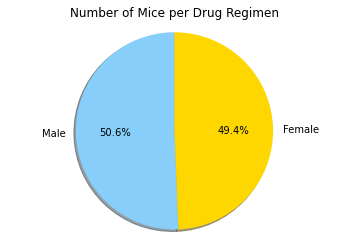

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#df_pie_chart_by_sex

labels = 'Male', 'Female'
sizes = [958,934]
colors = ['lightskyblue', 'gold']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')



sex_list = ["Male","Female"]
sex_count = [958,934]


plt.title("Number of Mice per Drug Regimen")
plt.show()


## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
df_treatements = df_clean_mouse.loc[df_clean_mouse("Drug Regimen")=='Capomulin']
df_treatements.head(5)                                   
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


TypeError: 'DataFrame' object is not callable

In [30]:
# Put treatments into a list for for loop (and later for plot labels)

regimen_list = ["CaCapomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", 
                "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for regimen in regimen_list:
    tumor_volume.append(df_clean_mouse.loc[df_clean_mouse["Drug Regimen"]==regimen]["Tumor Volume (mm3)"])
    quartiles = tumor_volume.([.25,.5,.75])                
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

AttributeError: 'list' object has no attribute 'quantile'

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

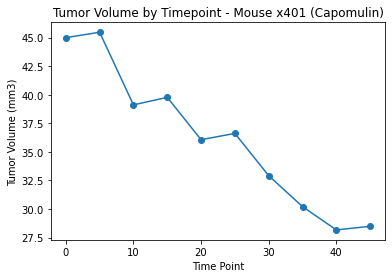

In [13]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#get mouse from row #10 taking Capomulin
regimen_mice = df_clean_mouse.loc[df_clean_mouse["Drug Regimen"]=="Capomulin"].reset_index()
regimen_mouse = regimen_mice["Mouse ID"][10]

#set x-axis to time and y-axis to tumor volume
x_time = df_clean_mouse.loc[df_clean_mouse["Mouse ID"]==regimen_mouse]["Timepoint"]
y_tumor_volume = df_clean_mouse.loc[df_clean_mouse["Mouse ID"]==regimen_mouse]["Tumor Volume (mm3)"]

#create plot
plt.plot(x_time,y_tumor_volume,marker="o")

#set title, labels and show graph

plt.title("Tumor Volume by Timepoint - Mouse x401 (Capomulin)")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

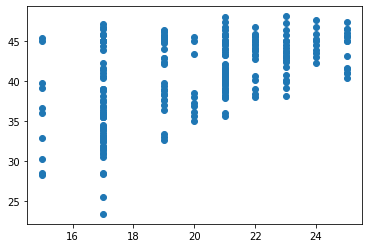

In [85]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

plt.scatter(regimen_mice.iloc[:,5],regimen_mice.iloc[:,7])
plt.xlabel=('Weight of Mouse')
plt.ylabel=('Tumor Volume (mm3)')
